# Part II - 

# Engagement of Members with Ford GoBike System in terms of time of day, day of the week.

## by (Ayodele Ayodeji Fortunate)

## Investigation Overview

> In this investigation, I wanted to look at When most trips are taken in terms of time of the day and days of the week in the bike-sharing system covering the greater San Francisco Bay area.

## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data consists of information regarding 183,412 member's individual trip, including duration in seconds, start time, end time, start station_id and bike share for all trip among others. 8,460 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike_data = pd.read_csv ('201902-fordgobike-tripdata.csv')
df_bike_master = pd.read_csv('bike_data_master')

# Setting the color for the entire notebook
sb.set_style('darkgrid') # set grid color
sb.set_palette('Set2') # set color palette

In [3]:
# convert start_day_time, end_day_time, start_weekday, end_weekday, start_month and end_month into ordered categorical types
ordinal_var_dict = {'start_day_time': ['Morning','Afternoon','Evening','Night'],
                    'end_day_time': ['Morning','Afternoon','Evening','Night'],
                    'start_weekday': ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
                    'end_weekday': ['Sun', 'Mon', 'Tue', 'Wed','Thu', 'Fri', 'Sat'],
                    'start_month' : ['Feb', 'Mar'],
                    'end_month' : ['Feb', 'Mar'],
                    'age_groups': ['Teenager','Young Adult','Adult','Senior Citizens']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_bike_master[var] = df_bike_master[var].astype(ordered_var)

## Distribution of Time of the Day

> Most of the bikes trips were done in the morning time, less were done in the evening, even less in the afternoon with the lest frequent rides happening at night. Same goes for end time of the day. The implies that most of the members engaging with bike-sharing system covering the greater San Francisco Bay starts and ends at same time of the day of which Morning is the most frequent.

In [4]:
#creating a function to plot a bar plot
def plot_day_dist(pltnr, x_col, xlabel, ylabel):
    fig.suptitle('Distribution of Time of the Day', fontsize = 20)
    plt.subplot(1,2, pltnr)
    colors = sb.color_palette()[0]
    sb.countplot(data = df_bike_master, x = x_col, color = colors)
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13)

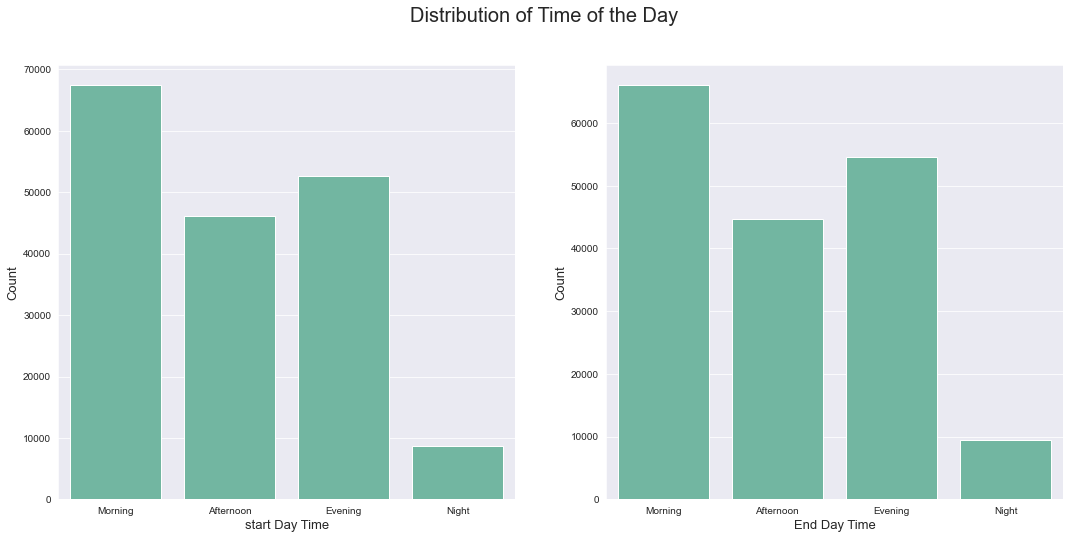

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
plot_day_dist(1, 'start_day_time', 'start Day Time', 'Count' )
plot_day_dist(2, 'end_day_time','End Day Time', 'Count')

## Distribution of  Days of the Week

> There are more start and end trips on Thursdays than any other day of the week. This shows that Thursdays are the most busy day of the week for bike trips in the San Francisco Bay Area.

In [6]:
#creating a function to plot a bar plot
def plot_week_dist(pltnr, x_col, xlabel, ylabel):
    fig.suptitle('Distribution of Days of the Week', fontsize = 20)
    plt.subplot(1,2, pltnr)
    colors = sb.color_palette()[0]
    sb.countplot(data = df_bike_master, x = x_col, color = colors)
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13)

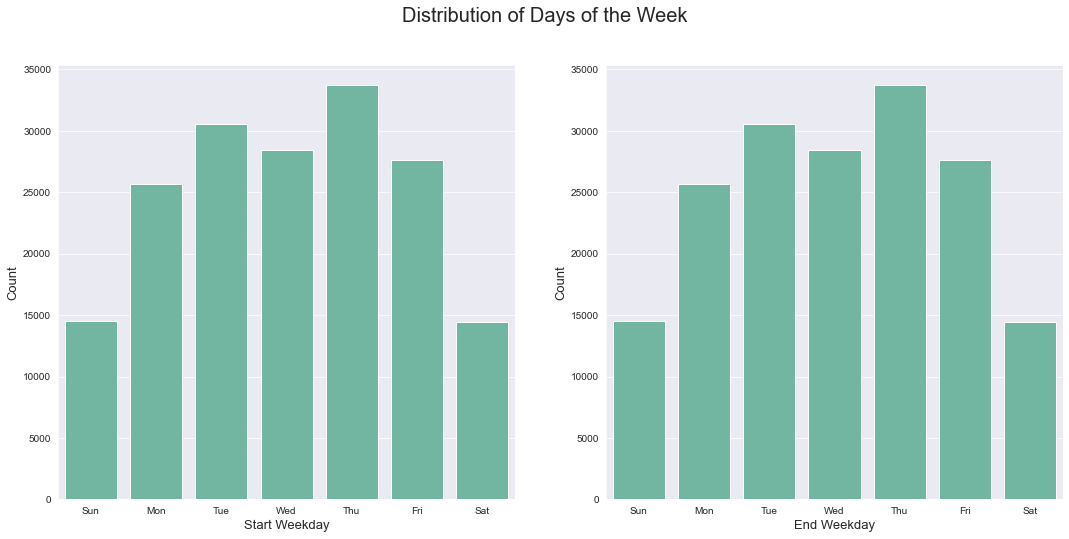

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
plot_week_dist(1, 'start_weekday', 'Start Weekday', 'Count' )
plot_week_dist(2, 'end_weekday','End Weekday', 'Count')

## Distribution of  Member's Age
Adult (aged 26 - 60) have the highest engagement in bike trips. They are followed by young adults (aged 18 - 25). Senior Citizens (60 and above) have the least engagement in bike trips. 

It is interesting to note that teenagers (aged 13-17) are not familiar with the use of the bike-sharing system in the greater part of San Francisco Bay area

In [8]:
# Taking the count of age group and assign it sge group count 
age_group_counts = df_bike_master['age_groups'].value_counts()

# Taking the index of each age gruop count 
age_group_counts_order = age_group_counts.index

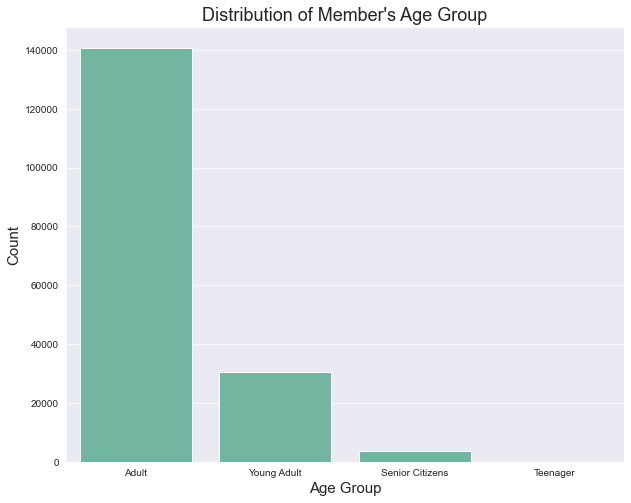

In [9]:
plt.figure(figsize=[10, 8])

colors = sb.color_palette()[0]
sb.countplot(data=df_bike_master, x='age_groups', color = colors, order = age_group_counts_order)
colors = sb.color_palette()[0]
plt.title('Distribution of Member\'s Age Group', fontsize = 18)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

## Member's age groups engaging with bike trips by time of the day

> Plotting the distribution member age group and time of the day on a logarithmic scale and comparing Member's age groups with time of the day, Morning time is the most frequent time of the day and also we can see that young adult, matured, middle age and the elderly are mostly having their trips in the morning. while Afternoon is the most frequent in teenager and old members.

In [10]:
#creating a function to plot a bar plot
def plot_graph(pltnr, x_col, hueval, xlabel, ylabel, yscale):
    fig.suptitle('Effect of Member\'s Age Groups on the Frequency of Trip per Time of the day', fontsize = 20)
    plt.subplot(1,2, pltnr)
    sb.countplot(data = df_bike_master, x = x_col, hue = hueval)
    plt.legend()
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13)
    plt.yscale(yscale)

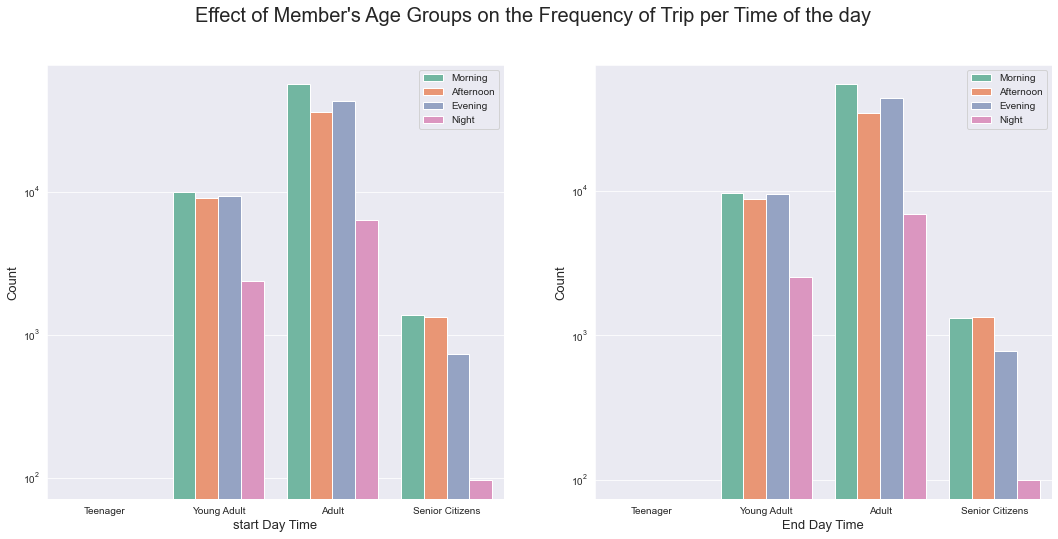

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
plot_graph(1, 'age_groups', 'start_day_time', 'start Day Time', 'Count', 'log')
plot_graph(2, 'age_groups', 'end_day_time', 'End Day Time', 'Count', 'log')

## Member's age groups engaging with bike trips by day of the week

> Also plotting the distribution member age group and day of the week on a logarithmic scale, for the start day of the week, Members engaging with the bike shairing system are matured members and Thursday is the most frequent day of the week in all the specified age groups. This is similar to end week days

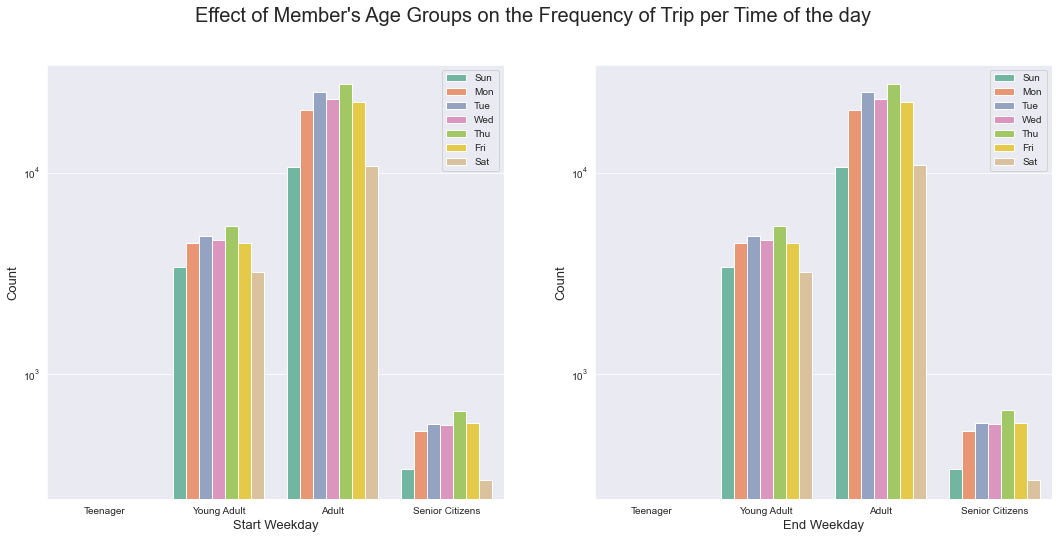

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
plot_graph(1, 'age_groups', 'start_weekday', 'Start Weekday', 'Count', 'log')
plot_graph(2, 'age_groups', 'end_weekday', 'End Weekday', 'Count', 'log')

##  User Type engaging with bike trip by time of the day

> Members who are subscribers are the ones really engaging in bike trips by times of the day as there are huge differences observed between the Customers and Subscribers in relationship with their usage of bike sharing systems by time of day. Comparing the effect of user type on the frequency of trips by time of day, Morning time seems to stand out for subscribers while Afternoons seem to be most frequent for customers and applies for both start and end times

In [13]:
#creating a function to plot a bar plot
def plot_chart(pltnr, x_col, hueval, xlabel, ylabel):
    fig.suptitle('Effect of User Type on the Frequency of Trip on Start day Time and End day Time', fontsize = 20)
    plt.subplot(1,2, pltnr)
    sb.countplot(data = df_bike_master, x = x_col, hue = hueval)
    plt.legend()
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13)

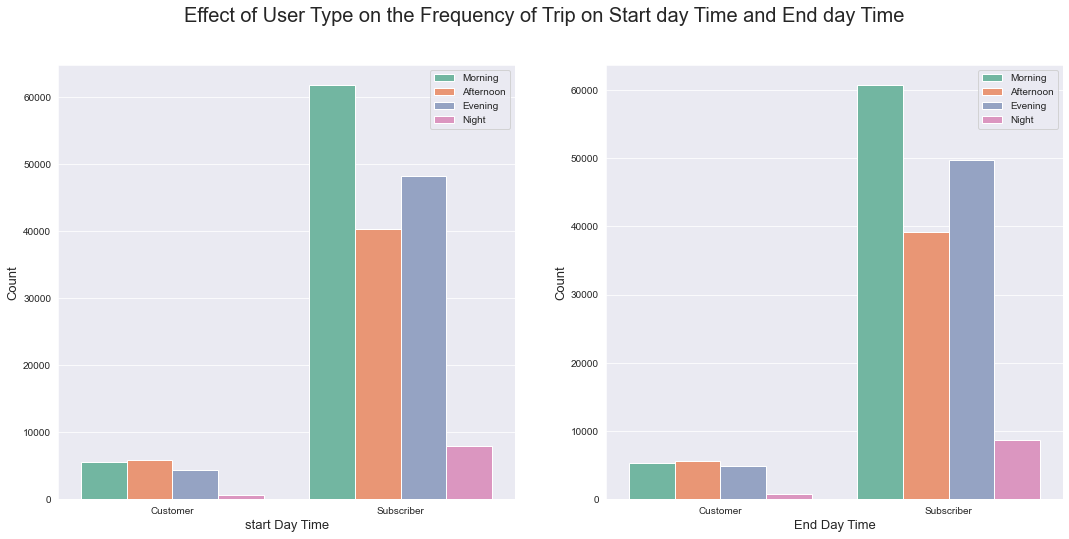

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
plot_chart(1, 'user_type', 'start_day_time', 'start Day Time', 'Count')
plot_chart(2, 'user_type', 'end_day_time', 'End Day Time', 'Count')

##  User Type engaging with bike trip by weekdays

> Interestingly Thursday still seems to stand out in both customers and suscribers For days of the week and this applies for both start and end weekdays.

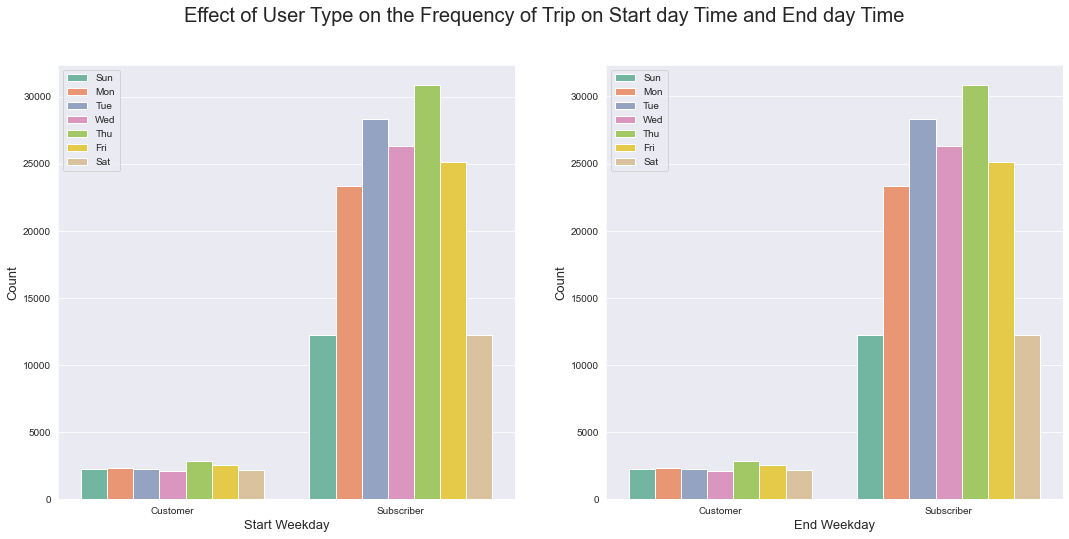

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
plot_chart(1, 'user_type', 'start_weekday', 'Start Weekday', 'Count')
plot_chart(2, 'user_type', 'end_weekday', 'End Weekday', 'Count')

## Member Gender Engaging with Bike Trips by Time of the Day

> Members who are Male members are engaging with bike trips by weekdays than female members. comparing Member Gender with time of the day, morning time appears to be the most frequent time of trips in both start and end time of the day. This is same for days of the week as we would see shortly.

In [16]:
#creating a function to plot a bar plot
def plot_mem_chart(pltnr, x_col, hueval, xlabel, ylabel):
    fig.suptitle('Effect of Member Gender on the Frequency of Trip on Start day Time and End day Time', fontsize = 20)
    plt.subplot(1,2, pltnr)
    sb.countplot(data = df_bike_master, x = x_col, hue = hueval)
    plt.legend()
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13)

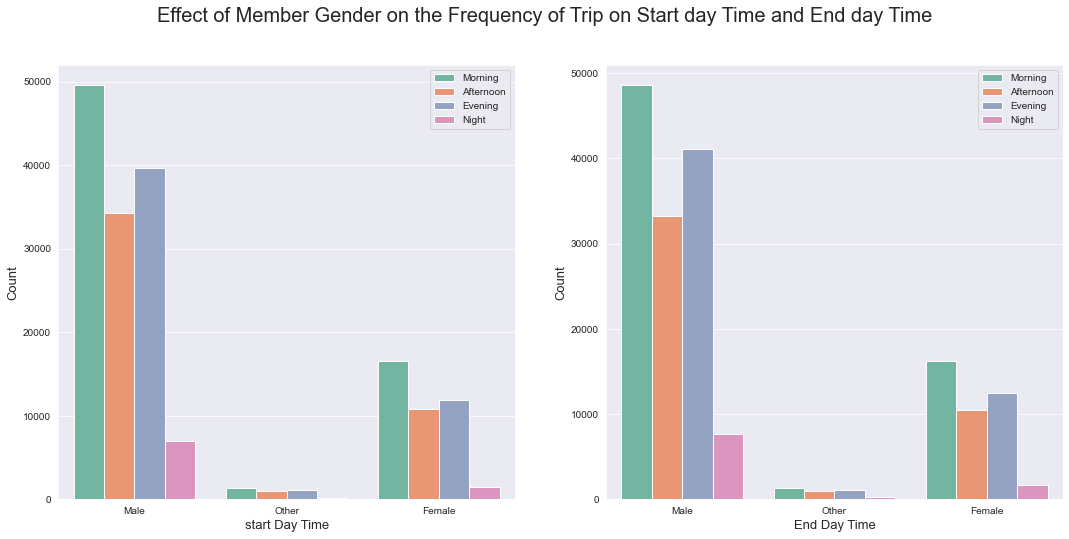

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
plot_mem_chart(1, 'member_gender', 'start_day_time', 'start Day Time', 'Count')
plot_mem_chart(2, 'member_gender', 'end_day_time', 'End Day Time', 'Count')

## Member Gender Engaging with Bike Trips by days of the week

> Members who are Male members are the ones really engaging with bike trips by weekdays as there are huge differences observed between the Male members  and female members  in relationship with their usage of bike sharing system by weekdays.

> comparing the relationship between member gender and start weekday, Thursday still seems to stand out in all the member genger.

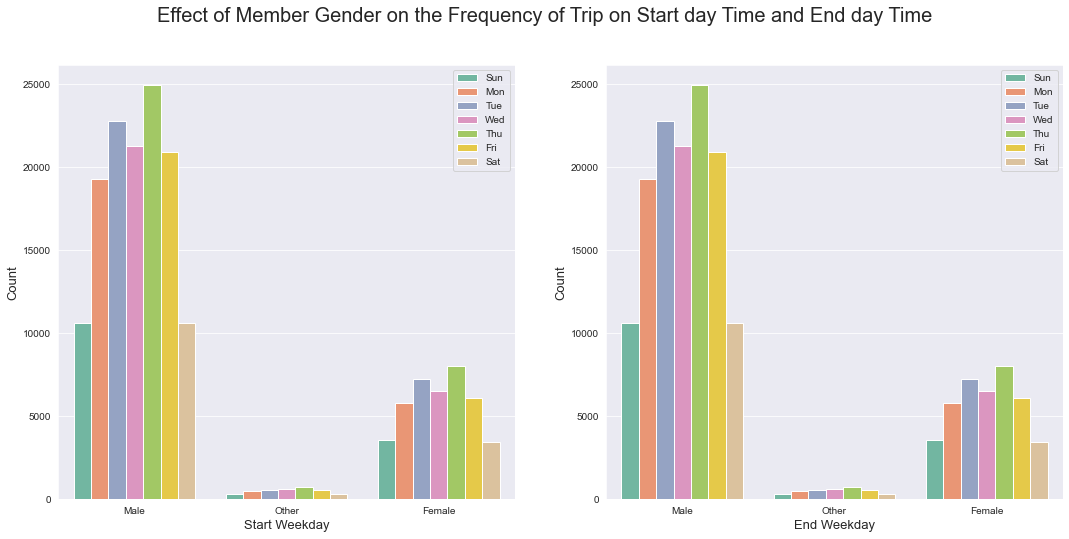

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
plot_mem_chart(1, 'member_gender', 'start_weekday', 'Start Weekday', 'Count')
plot_mem_chart(2, 'member_gender', 'end_weekday', 'End Weekday', 'Count')

In [19]:
# creating a list for the top 10 start stations 
list_top_10_start = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
                  'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)',
                  'San Francisco Caltrain (Townsend St at 4th St)', 'San Francisco Ferry Building (Harry Bridges Plaza)',
                  'Howard St at Beale St', 'Steuart St at Market St', 'Powell St BART Station (Market St at 5th St)']

# creating a list for the top 10 start stations 
list_top_10_end = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Market St at 10th St', 
                     'Montgomery St BART Station (Market St at 2nd St)', 'San Francisco Ferry Building (Harry Bridges Plaza)',
                     'San Francisco Caltrain (Townsend St at 4th St)', 'Powell St BART Station (Market St at 4th St)', 
                     'Berry St at 4th St', 'The Embarcadero at Sansome St', 'Steuart St at Market St', 
                     'Powell St BART Station (Market St at 5th St)']

In [20]:
# Extracting 10 top rows of trips from the entire dataset 
df_top_10_start = df_bike_master.loc[df_bike_master['start_station_name'].isin(list_top_10_start)]
df_top_10_end = df_bike_master.loc[df_bike_master['end_station_name'].isin(list_top_10_end)]

## Effect of the stations on the frequency of trips per days of the week 

> Compairing start weekdays with top 10 start stations, I observed that **Thursday** which happens to be the most frequent start day of the week that members are engaging with the bike sharing system still happens to be the most frequent start days in the top 10 most used start stations except for **Steuart St at Market St** where **Tuesday** is the most frequent.

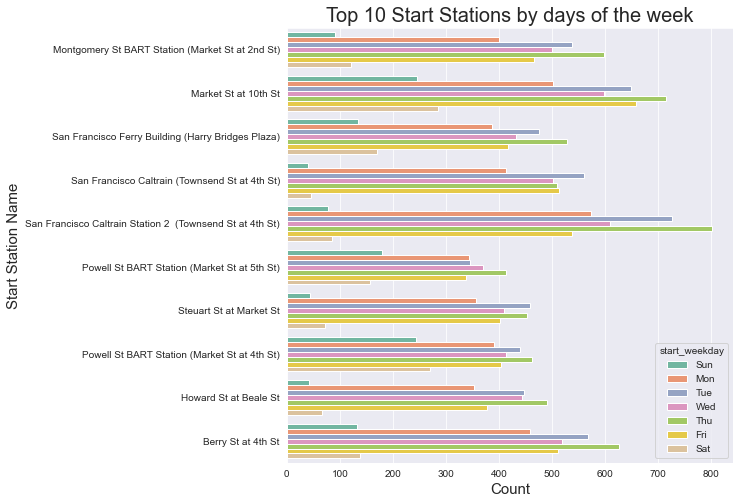

In [21]:
plt.figure(figsize=(8,8))
sb.countplot(data=df_top_10_start, y='start_station_name', hue='start_weekday')
plt.title('Top 10 Start Stations by days of the week', fontsize =20)
plt.ylabel('Start Station Name', fontsize =15)
plt.xlabel('Count', fontsize =15);

## Duration and User Type by Time of the day 

> Comparing duration in minutes and user type by time of the day , I found out that, Morning time of the day still happens to be the most frequent time of the day that members are engaging with bike sharing system in San Francisco Bay area. 

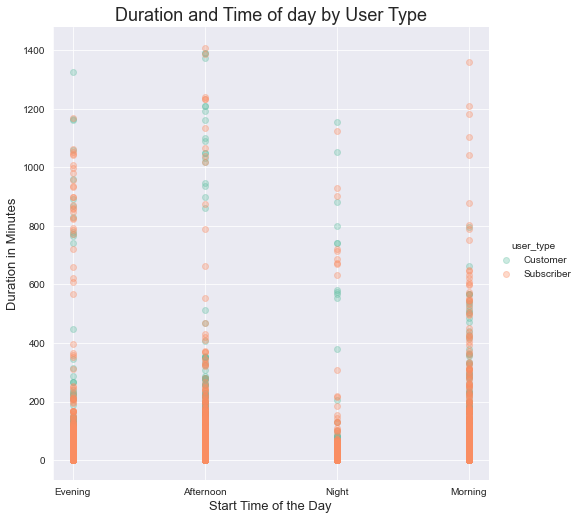

In [29]:
g = sb.FacetGrid(data =  df_bike_master, hue = 'user_type', height = 7)
g.map(plt.scatter, 'start_day_time','duration_min', alpha = 1/3)
g.add_legend()

plt.title('Duration and Time of day by User Type', fontsize = 18)
plt.xlabel('Start Time of the Day', fontsize = 13)
plt.ylabel('Duration in Minutes', fontsize = 13);

## Duration and User Type by Day of the Week 

> For weekdays, Members who are Subscribers are more engaging with the bike trip and most interestingly, Fridays happens to be the most frequent time of the day that members are engaging with bike sharing system in San Francisco Bay area.

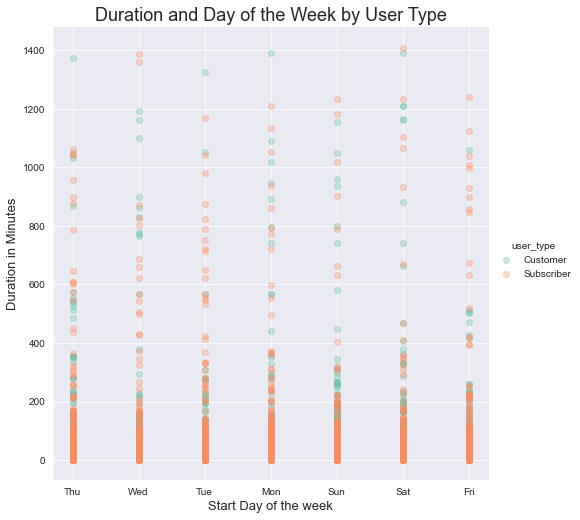

In [28]:
g = sb.FacetGrid(data =  df_bike_master, hue = 'user_type', height = 7)
g.map(plt.scatter, 'start_weekday','duration_min', alpha = 1/3)
g.add_legend()

plt.title('Duration and Day of the Week by User Type', fontsize = 18)
plt.xlabel('Start Day of the week', fontsize = 13)
plt.ylabel('Duration in Minutes', fontsize = 13);

## Duration and Age Groups by Time of the Day  

> Compared duration in minutes and member age groups by time of the day , **Afternoon** time of the day happens to be the most frequent time of the day that members who are Adults, Young Adults are engaging with bike sharing system in San Francisco Bay area. While it seems to be Morning time for senior citizens though almost equal with the Afternoon time. which implies that senior citizens prefer to make their trips in the morning time and Afternoon time of the day.

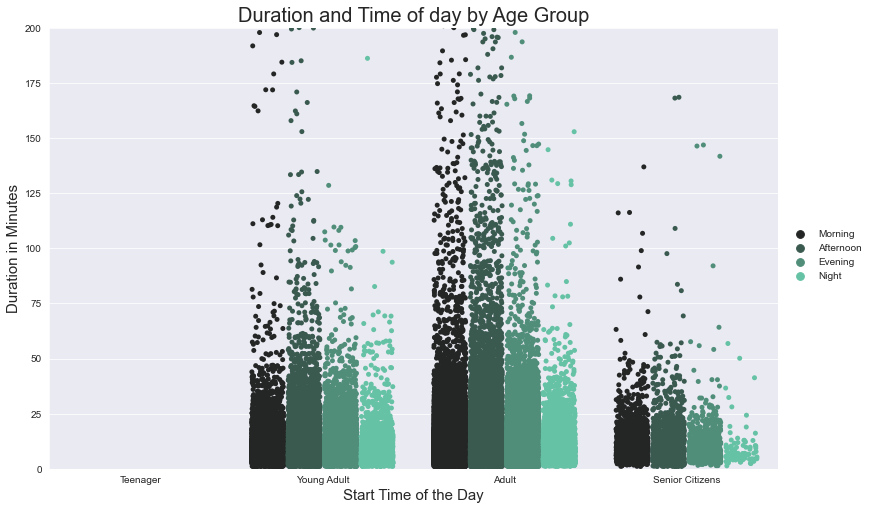

In [30]:
mult_plot = sb.FacetGrid(data = df_bike_master)
mult_plot.map(sb.stripplot, 'age_groups', 'duration_min', 'start_day_time', dodge = True, jitter = .35)

mult_plot.fig.set_size_inches(14, 8)
mult_plot.add_legend()
plt.ylim(0,200)

plt.title('Duration and Time of day by Age Group', fontsize = 20)
plt.xlabel('Start Time of the Day', fontsize = 15)
plt.ylabel('Duration in Minutes', fontsize = 15);

## Duration and Age Groups by Day of the Week

> For Weekdays, Most interestingly, having compared duration and time of the day by member age groups, **Sunday** time of the day seems to be the most frequent time of the day that members who are Young Adults and Senior Citizens except for members who are Adults where **Saturday** seems to be the most frequent, are engaging with bike sharing system in San Francisco Bay area.

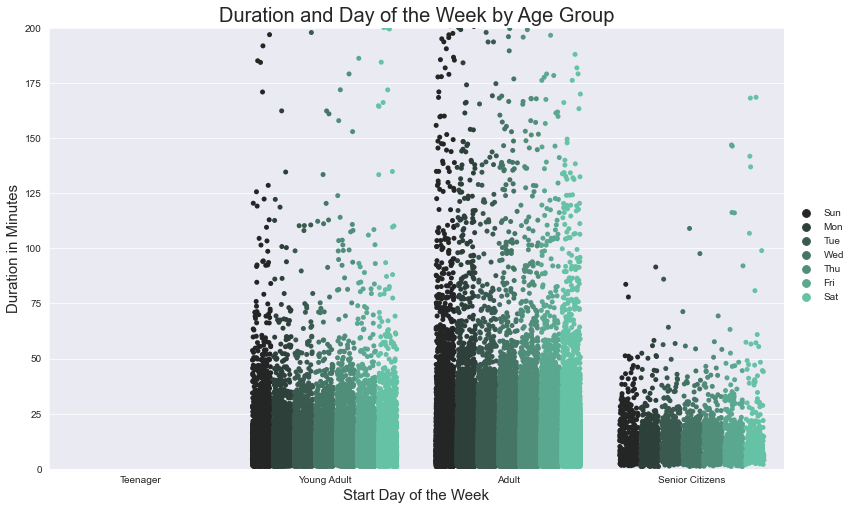

In [31]:
mult_plot = sb.FacetGrid(data = df_bike_master)
mult_plot.map(sb.stripplot, 'age_groups', 'duration_min', 'start_weekday', dodge = True, jitter = .35)

mult_plot.fig.set_size_inches(14, 8)
mult_plot.add_legend()
plt.ylim(0,200)

plt.title('Duration and Day of the Week by Age Group', fontsize = 20)
plt.xlabel('Start Day of the Week', fontsize = 15)
plt.ylabel('Duration in Minutes', fontsize = 15);

## Duration and Member Gender by Time of the Day 

> Compared duration in minutes and time of the day and weekdays by member gender, **Afternoon** time of the day seems to be the most frequent time of the day that members who are Male, Female and Others are engaging with bike sharing system in longer duration in San Francisco Bay area.

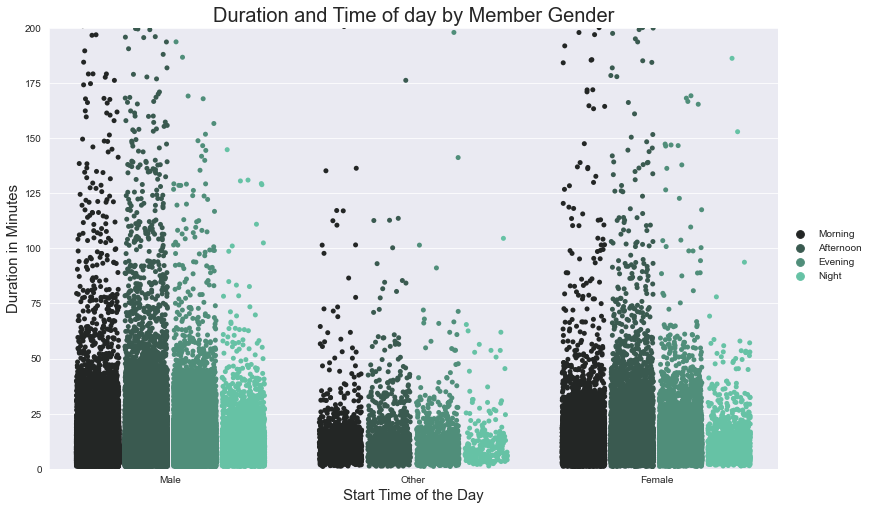

In [32]:
mult_plot = sb.FacetGrid(data = df_bike_master)
mult_plot.map(sb.stripplot, 'member_gender', 'duration_min', 'start_day_time', dodge = True, jitter = .35)

mult_plot.fig.set_size_inches(14, 8)
mult_plot.add_legend()
plt.ylim(0,200)

plt.title('Duration and Time of day by Member Gender', fontsize = 20)
plt.xlabel('Start Time of the Day', fontsize = 15)
plt.ylabel('Duration in Minutes', fontsize = 15);

## Duration and Member Gender by Day of the Week

>  For Weekdays, **Saturday** seems to be the most frequent time of the day that members who are Male. **Friday** for Female members while it is **Thursday** for Others are engaging with bike sharing system in longer duration in San Francisco Bay area.

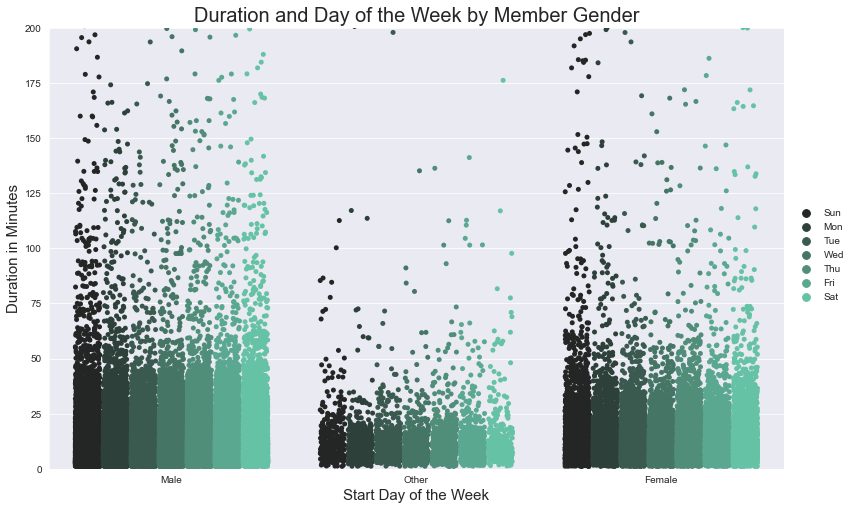

In [33]:
mult_plot = sb.FacetGrid(data = df_bike_master)
mult_plot.map(sb.stripplot, 'member_gender', 'duration_min', 'start_weekday', dodge = True, jitter = .35)

mult_plot.fig.set_size_inches(14, 8)
mult_plot.add_legend()
plt.ylim(0,200)

plt.title('Duration and Day of the Week by Member Gender', fontsize = 20)
plt.xlabel('Start Day of the Week', fontsize = 15)
plt.ylabel('Duration in Minutes', fontsize = 15);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
